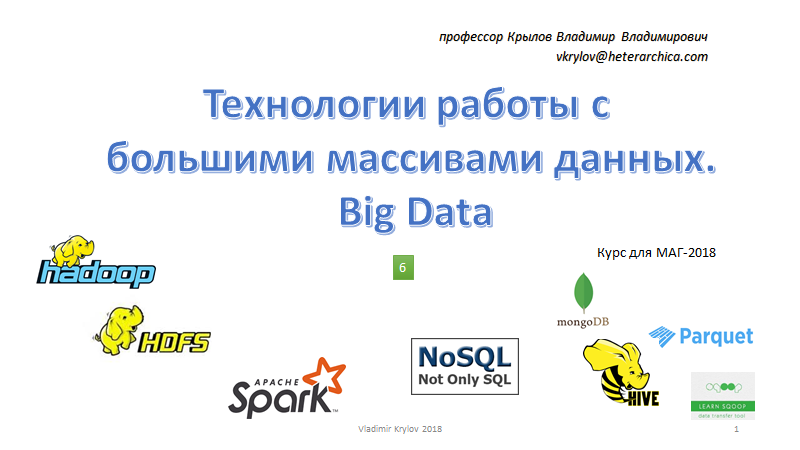

# Рекомендательные системы. Recommender Systems

Рекомендательные системы (RS) представляют собой важный класс систем с обучением и находят применение во многих областях, таких как Е-коммерция, разработка ПО, организация технического обслуживания, медиа услуги и еще во многих других, где требуется давать советы на основе предыдущего опыта. https://en.wikipedia.org/wiki/Recommender_system 
Наиболее просто задача построения RS формулируется на примере покупки книг в интернет-магазине.

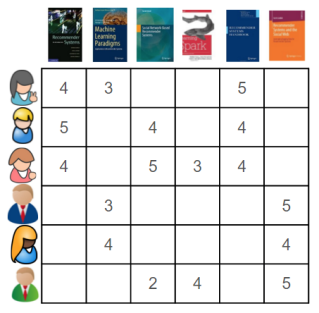

На рисунке показано распределение предпочтений клиентов - пользователей сервиса при покупке книг. Все предпочтения получают оценку от 1 до 5, 5 наиболее понравились. Первый пользователь (строка 1) предпочитает первую книгу (столбец 1) с оценкой 4, вторую -  с оценкой 3, а пятую - с оценкой 5. Если ячейка пуста, пользователь не отдал предпочтения этой книге или ничего об этом неизвестно.

Алгоритмы рекомендаторов обычно реализуются в модели рекомендатора, которая отвечает за получение данных, таких как предпочтения пользователя и описания элементов, которые могут быть рекомендованы, и прогнозирование того, какие элементы будут представлять интерес для данного набора пользователей.

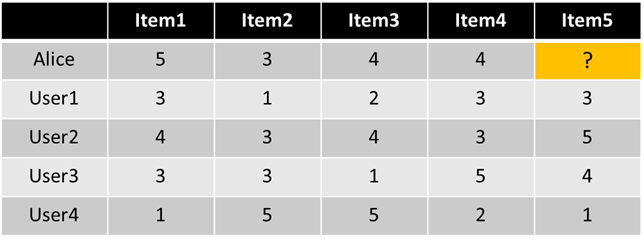

Основными семействами алгоритмов RS являются следующие (https://buildingrecommenders.wordpress.com/2015/11/16/overview-of-recommender-algorithms-part-1/):

- Collaborative Filtering - CF - коллаборативная фильтрация (user-based  и item-based)
- Content-based Filtering - фильтрация по контенту
- Hybrid Approaches - гибридные подходы
- Popularity - по популярности
- New ML based - основанные на новых моделях машинного обучения

В user-based collaborative filteringи первое, что мы хотим сделать, это рассчитать, насколько похожи пользователи друг к другу если основываться на их предпочтениях для книг. Давайте рассмотрим это с точки зрения одного пользователя, который появляется в первой строке на следующем рисунке. Для этого обычно представлять каждого пользователя как вектор (или массив), который содержит пользовательские предпочтения для каждого из предметов (каждой книги). Совсем просто сравнивать пользователей друг с другом с использованием различных показателей сходства. В этом примере мы будем использовать сходство по косинусу угла между векторами. Когда мы берем первого пользователя и сравниваем его с пятью другими пользователями, мы можем видеть, насколько похожи первый пользователь для остальных. Как и в случае большинства показателей сходства, чем выше сходство между векторами, тем они более похожи друг на друга. В этом случае первый пользователь очень похож на двух пользователей, поскольку они предпочитают две общие книги, менее похожие на двух других пользователей, которые предпочитают только одну общую книгу и совсем не похожи на последнего пользователя, с которым они не предпочитают ни одной книги.

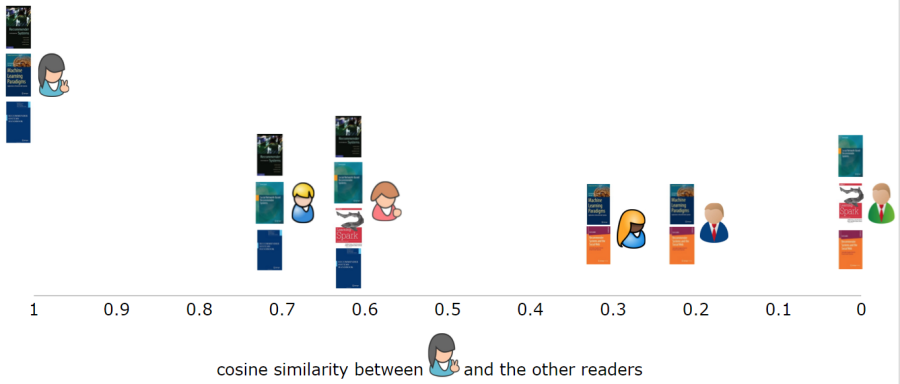

так появляется матрица похожести пользователей

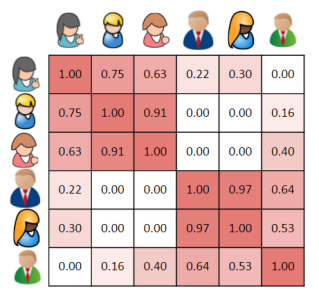

 Similarity matrix - матрица похожести пользователей.  Каждый элемент матрицы user similarity вычислен как cos (косинусная мера похожести) угла между векторами пользователей по предпочтениям по каждой книге.

Теперь мы готовы генерировать рекомендации для каждого из пользователей, используя collaborative filtering (совместную фильтрацию) на основе пользователей. В общем, для данного пользователя это означает поиск пользователей, которые наиболее похожи на них, и рекомендации для товаров, которые эти похожие пользователи ценят, взвешивая их по тому, насколько похожи пользователи. Возьмем первого пользователя и создадим для него некоторые рекомендации. Во-первых, мы находим n самых популярных пользователей, которые больше всего похожи на первого пользователя, удалим книги, которые пользователь уже оценил, ,берем веса книг, которые читают наиболее похожие пользователи , и суммируем их вместе. Для примера мы возьмем n = 2, то есть два пользователя, которые наиболее похожи на первого пользователя, чтобы генерировать рекомендации. Этими двумя пользователями являются пользователи 2 и 3. Так как первый пользователь уже оценил книги 1 и 5, выработанные рекомендации составляют книги 3 (оценка 4,5) и 4 (оценка 3)

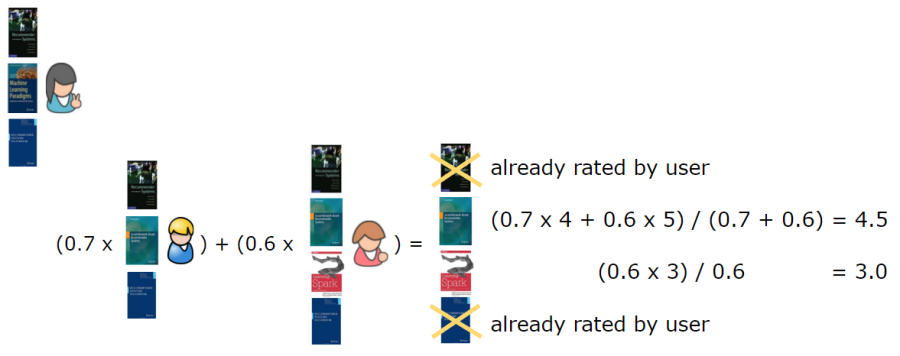

В item-based collaborative filtering, подобно user-based, первое, что мы хотим сделать, это вычислить матрицу похожести. Однако на этот раз мы хотим взглянуть на сходство в отношении предметов, а не пользователей. Точно так же мы показываем, как подобная книга относится к другим книгам, если мы должны представлять книги в виде векторов (или массивов) пользователей, которые их оценили, и сравнивать их по косинусной функцией похожести. Первая книга в первой колонке наиболее похожа на пятую книгу в пятом столбце, так как она одинаково оценивается одним и тем же набором пользователей (см. рисунок ниже). Третья наиболее похожая книга оценена двумя из тех же пользователей, четвертая и вторая книги имеют только одного пользователя, в то время как последняя книга не считается похожей вообще, поскольку у нее нет общих пользователей.

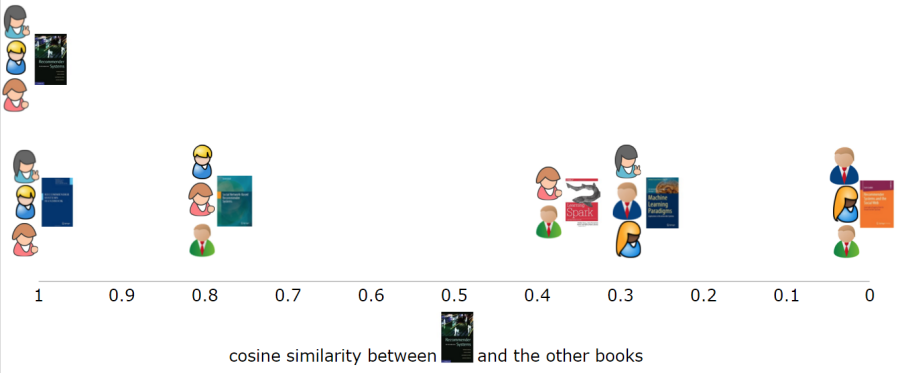

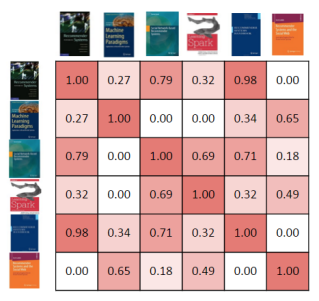

Теперь, когда мы знаем, насколько похожи книги друг другу, мы можем создавать рекомендации для пользователей. В подходе, основанном на предметах, мы берем предметы, которые ранее оценивали пользователь, и рекомендуем предметы, наиболее похожие на них. В нашем примере первому пользователю будет рекомендована третья книга, за которой следует шестая книга (рисунок ниже). Опять же, мы используем только две наиболее похожие книги для книг, которые ранее оценивали пользователи.

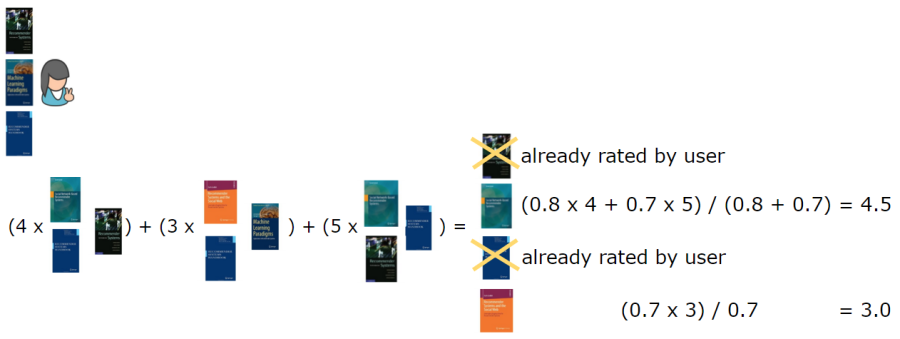

Методы ближайшего соседа пользуются значительной популярностью из-за их простоты и эффективности, а также их способности создавать точные и персонализированные рекомендации. Однако они также имеют некоторые ограничения масштабируемости, поскольку они требуют вычисления похожести (между пользователями или предметами), которые быстро растут по сложности как с количеством пользователей, так и с количеством элементов. В худшем случае это вычисление может быть O (m * n), но на практике ситуация немного лучше с O (m + n), отчасти из-за использования разреженности данных. В то время как разреженность помогает с масштабируемостью, это также представляет проблему для методов на основе соседства, потому что у нас есть только пользовательские оценки для небольшого процента от большого количества элементов. Например, в портале Mendeley у нас есть миллионы статей, и пользователь, возможно, прочитал несколько сотен этих статей. Вероятность того, что два пользователя, каждый из которых прочитал 100 статей, имеет общую статью (в каталоге из 50 миллионов статей) - 0,0002.

Подходы  CF, основанные на модели, могут помочь преодолеть некоторые ограничения методов, основанных на методе ближайших соседей. В отличие от этих методов, которые используют рейтинги пользовательских позиций непосредственно для прогнозирования оценок для новых элементов, основанные на модели подходы используют рейтинги для изучения прогностической модели, основанной на том, какие прогнозы сделаны для новых элементов. Общая идея заключается в моделировании взаимодействия пользовательских элементов с использованием алгоритмов машинного обучения, которые находят шаблоны в данных. В целом, модельные CF рассматриваются как более сложные алгоритмы для составления рекомендаций для CF. Существует множество различных алгоритмов, которые могут быть использованы для построения моделей, на основе которых можно делать прогнозы, например, байесовские сети, кластеризация, классификация, регрессия, матричная факторизация, ограниченные машины с болтцманом и т. Д. Некоторые из этих методов играли ключ Роль в окончательных решениях для получения премии Netflix. Netflix проводила конкурс с 2006 по 2009 год, предложив команде $ 1mil главный приз, который может генерировать рекомендации, которые были на 10% точнее, чем их рекомендательная система в то время. Выигранным решением был ансамбль (т. е. смесь) из более чем 100 различных моделей алгоритмов, из которых матричная факторизация и ограниченные машины больцмана были приняты в производстве Netflix.

Матричная факторизация (например, разложение по собственным векторам (singular value decomposition, SVD++) преобразует как пространство предметов так и пространство пользователей в одно и то же скрытое пространство, которое представляет собой базовые взаимодействия между пользователями и предметами (рисунок внизу). Интуитивная интерпретация матричной факторизации заключается в том, что скрытые функции показывают, как пользователи оценивают предметы. Учитывая скрытые представления пользователей и предметов, мы можем сделать прогнозы о том, насколько пользователям понравятся предметы, которые они еще не оценили.

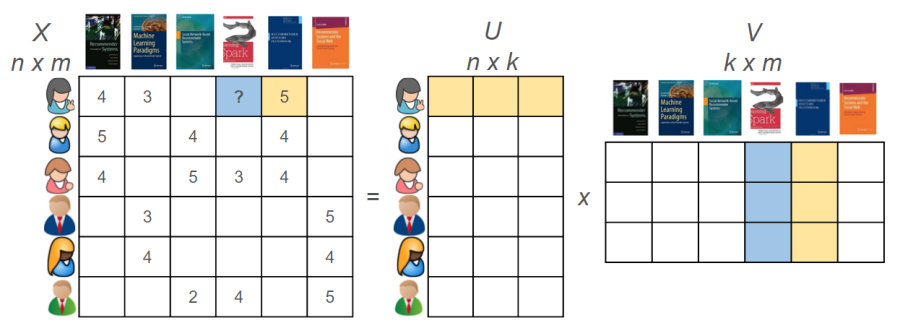

При использовании этого подхода к полному тексту книг (чаще к их аннотациям), называемом методом контентной фильтрации необходимо учитывать особенности нормализации слов в описаниях предметов. Во-первых, обычно приходится удалять стоп-слова (например, знаки препинания, очень общие слова) из содержимого текста книги, а затем представлять книги в виде вектора (или массива), который указывает, какие слова присутствуют (рисунок ниже). Это называется представлением текста в векторном пространстве или embedding. В предыдущих занятиях мы изучали это подробно.

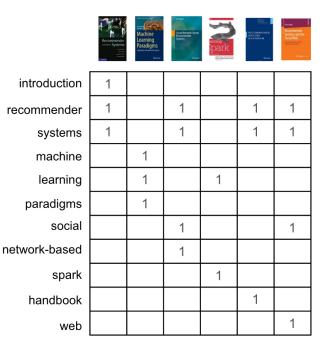

Учитывая это представление каждой книги, довольно прямолинейно сравнивать книги друг с другом с использованием различных показателей сходства. В этом примере мы будем использовать похожесть по косинусной мере. Когда мы берем первую книгу и сравниваем ее с пятью другими книгами, мы можем видеть, насколько аналогична первая книга по отношению ко всем остальным (рисунок ниже). Как и в случае большинства показателей сходства, чем выше сходство между векторами, тем они более похожи друг на друга. В этом случае первая книга очень похожа на 3 книги, с которыми у нее есть 2 слова (рекомендация и системы). Это больше похоже на книгу с меньшим количеством слов, что имеет смысл, так как у нее меньше лишних слов, не общих. И это делает ее совсем  не похожей на две другие книги, с которыми у нее нет общих слов.

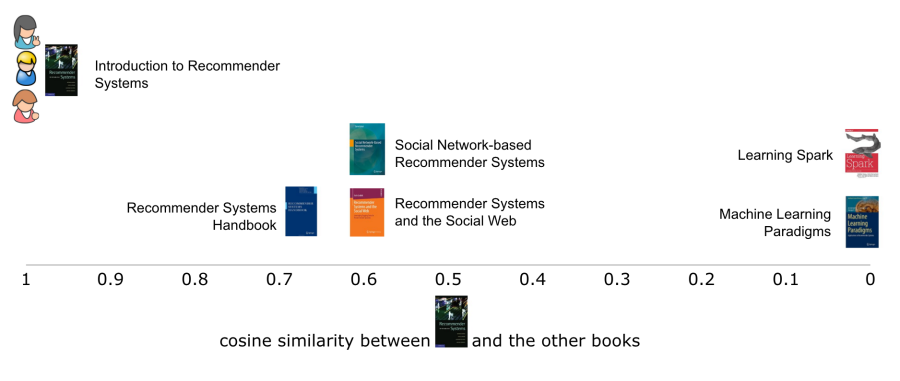

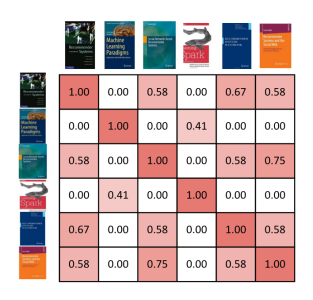

Матрица похожести (Similarity matrix) между книгами. Элементы матрицы вычисляются как cosine similarity между векторами, представляющими книги в семантическом пространстве.

Теперь, когда мы знаем, насколько похожи книги друг другу, мы можем создавать рекомендации для пользователей. Подобно  подходу, основанному на предметах, описанному выше, мы берем книги, которые ранее оценивали пользователь, и рекомендуем другие книги, наиболее похожие на них. Разница в том, что здесь сходство основано на содержании книг, а именно на названиях, аннотациях или даже полных текстах, а не на данных об использовании. В нашем примере первому пользователю будет рекомендована шестая книга, за которой следует четвертая книга (рисунок внизу). Опять же, мы используем только две наиболее похожие книги для книг, которые ранее оценивали пользователи.

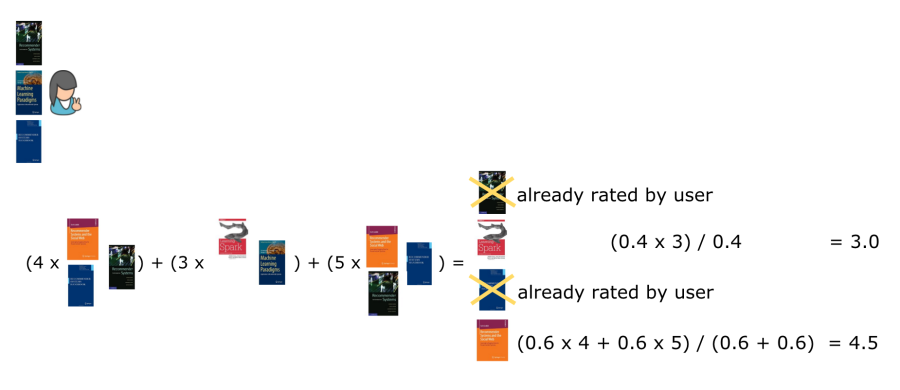

Возьмем первого пользователя и создадим для него некоторые рекомендации. Сначала мы получаем рекомендации по collaborative filtering (CF), основанному на пользователях и предметах,  и фильтрации на основе контента (CB) . Стоит отметить, что на этом маленьком игрушечном примере три подхода порождают несколько разные рекомендации для одного и того же пользователя, хотя вход одинаковый для всех трех из них.

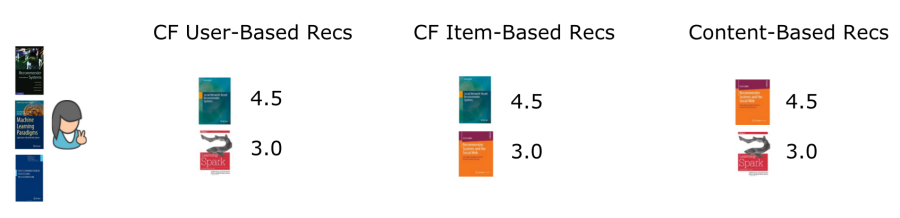

Затем мы генерируем рекомендации для данного пользователя с использованием взвешенного гибридного рекомендатора, накладывая 40% веса на пользовательский CF (user-based CF), 30% на товарный CF (item-based CF) и 30% на фильтрацию на основе контента. В нашем примере пользователю будут рекомендованы все три книги, которые они еще не оценили, по сравнению с получением только двух рекомендаций книги по отдельным алгоритмам.

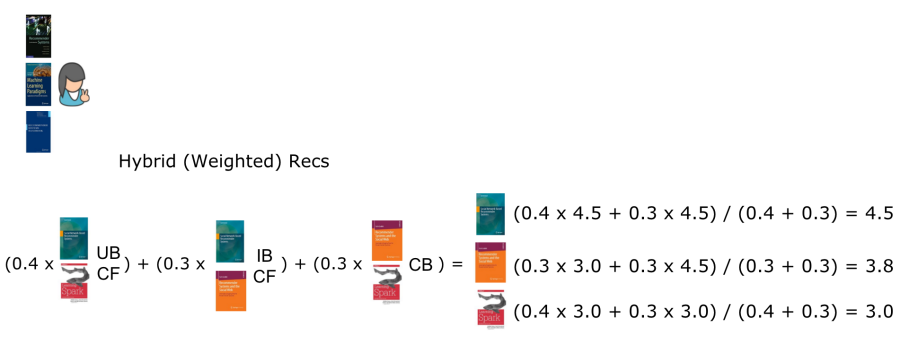


Хотя гибридные подходы направлены на устранение некоторые из больших проблем и ограничений методов CF и CB  им также требуется много работы для обеспечения правильного баланса между различными алгоритмами в системе. Другим способом комбинирования индивидуальных алгоритмов рекомендаций является использование ансамблевых методов, где мы обучаем функцию (т. е. обучаем весь ансамбль) как смешивать результаты различных методов. Стоит отметить, что обычно ансамбли объединяют не только разные алгоритмы, но и различные вариации / модели, основанные на одном и том же алгоритме. Например, выигрышное решение в  Netflix состояло из более чем 100 различных моделей из более чем 10 различных алгоритмов (популярность, методы соседства, матричная факторизация, ограниченные больцмановские машины, регрессия и т. д.), которые были объединены в ансамбле с использованием gradient boosted decision trees.

Также стоит добавить, что подходы, основанные на популярности, являются хорошим решением новой проблемы, называемой холодным пуском для нового пользователя. Эти подходы оценивают предметы с использованием той или иной формы измерения популярности, такой как больше всего раз  загруженной или купленной, и рекомендуют эти популярные предметы новым пользователям. Это простой, но мощный подход, когда у вас есть хорошая оценка популярности и часто обеспечивает хорошую основу для сравнения других рекомендаций. Популярность может использоваться сама по себе как алгоритм для системы рекомендаций, чтобы получить достаточную активность и использование для пользователя, прежде чем переключиться на подходы, которые могут лучше моделировать интересы пользователей, такие как совместная фильтрация и фильтрация на основе контента. 

### Посмотрим имплементацию рекомендательной системы на основе коллаборативной фильтрации методом чередующихся наименьших квадратов - ALS - Alternating Least Squares

Один из самых популярных алгоритмов для решения проблем совместной кластеризации (и, в частности, для коллаборативной фильтрации) называется Matrix Factorization (MF). В своей простейшей форме он принимает матрицу R оценок, заданную m пользователями для n элементов . Применение этой техники на R приведет к разложению R на две матрицы U и P такие, что R ` UP аппроксимирует R.

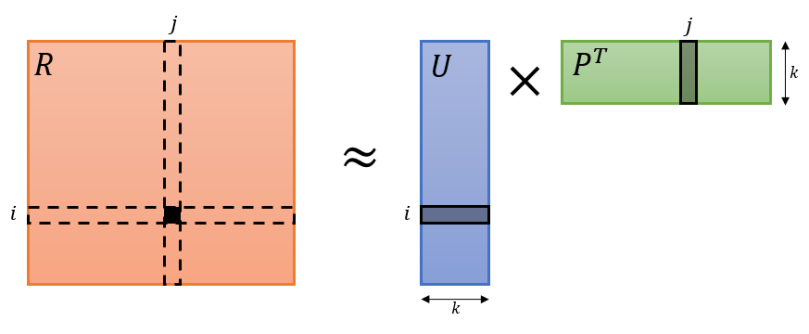

 MF - это форма процесса оптимизации, целью которой является аппроксимация исходной матрицы R двумя матрицами U и P , что минимизирует следующую функцию стоимости:

Первым слагаемым в этой функции стоимости является средняя дистанционная мера квадратной ошибки (MSE) между исходной матрицей оценок R и ее приближением UP. Второе слагаемое называется «членом регуляризации» и добавляется для управления обобщенным решением (чтобы предотвратить переопределение некоторых локальных шумовых эффектов на рейтинги).
Тот факт, что значения U и P являются неизвестными переменными, делает эту функцию стоимости невыпуклой.


Но еще один интересный факт заключается в этом члене - если мы зафиксируем P и оптимизируем только для U, проблема просто сводится к задаче линейной регрессии 

Обыкновенные наименьшие квадраты - OLS


Метод чередования наименьших квадратов делает именно это. Это двухэтапный процесс итеративной оптимизации. На каждой итерации она сначала фиксирует P и решает для U, а затем фиксирует U и решает для P. Поскольку решение OLS уникально и гарантирует минимальный MSE, на каждом шаге функция стоимости может либо уменьшаться, либо оставаться неизменной, но никогда не увеличиваться , Чередование двух этапов гарантирует снижение стоимости функции до сближения. Аналогично градиент оптимизации спуска, он гарантированно сходится только к локальным минимумам, и в конечном счете , зависит от начальных значений для U или P .

Поскольку функция фактической стоимости включает в себя термин регуляризации, она немного длиннее. Согласно двухэтапному процессу, функция стоимости может быть разбита на две функции затрат:

И соответствующие методу ALS  решения 

Для метода чередования наименьших квадратов написана высокоэффективная библиотечная программа в составе SparkML
Пример ниже заимствован из https://github.com/susanli2016/PySpark-and-MLlib 

In [1]:
from pyspark.sql import SparkSession
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator

In [2]:
import sparkmonitor
!jupyter nbextension install sparkmonitor --py --user --symlink 
!jupyter nbextension enable sparkmonitor --py --user            
!jupyter serverextension enable --py --user sparkmonitor
!ipython profile create && echo "c.InteractiveShellApp.extensions.append('sparkmonitor.kernelextension')" >>  $(ipython profile locate default)/ipython_kernel_config.py

Installing /opt/conda/lib/python3.6/site-packages/sparkmonitor/static -> sparkmonitor
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable sparkmonitor --user --py
    
Enabling notebook extension sparkmonitor/module...
      - Validating: OK
Enabling: sparkmonitor.serverextension
- Writing config: /home/jovyan/.jupyter
    - Validating...
      sparkmonitor.serverextension  OK


In [3]:
print(conf.toDebugString())

spark.extraListeners=sparkmonitor.listener.JupyterSparkMonitorListener
spark.driver.extraClassPath=/opt/conda/lib/python3.6/site-packages/sparkmonitor/listener.jar


In [4]:
conf.setAppName('ExtensionTestingApp')
#conf.setMaster('spark://dell-inspiron:7077') # if master is started using command line
conf.setMaster('local[*]')
from pyspark import SparkContext
sc=SparkContext.getOrCreate(conf=conf) #Start the spark context

In [5]:
spark = SparkSession.builder.appName('ExtensionTestingApp').getOrCreate()

In [8]:
df = spark.read.csv('BigData_HSE/movielens_ratings.csv', inferSchema= True, header = True)

df.printSchema()

root
 |-- movieId: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- userId: integer (nullable = true)



In [9]:

df.show(9)

+-------+------+------+
|movieId|rating|userId|
+-------+------+------+
|      2|   3.0|     0|
|      3|   1.0|     0|
|      5|   2.0|     0|
|      9|   4.0|     0|
|     11|   1.0|     0|
|     12|   2.0|     0|
|     15|   1.0|     0|
|     17|   1.0|     0|
|     19|   1.0|     0|
+-------+------+------+
only showing top 9 rows



movieID это идентификатор фильма, rating - выставленная фильму оценка пользователем с userId

In [10]:
df.describe().show()

+-------+------------------+------------------+------------------+
|summary|           movieId|            rating|            userId|
+-------+------------------+------------------+------------------+
|  count|              1501|              1501|              1501|
|   mean| 49.40572951365756|1.7741505662891406|14.383744170552964|
| stddev|28.937034065088994| 1.187276166124803| 8.591040424293272|
|    min|                 0|               1.0|                 0|
|    max|                99|               5.0|                29|
+-------+------------------+------------------+------------------+



Разделим набор данных на обучающий и тестовый св отношении 80% к 20%

In [11]:
train, test = df.randomSplit([0.8, 0.2])

In [12]:
als = ALS(maxIter=5,regParam=0.01,userCol='userId',itemCol='movieId',ratingCol='rating')

In [13]:
model = als.fit(train)

In [14]:
predictions = model.transform(test)

In [15]:
predictions.show()

+-------+------+------+-----------+
|movieId|rating|userId| prediction|
+-------+------+------+-----------+
|     31|   1.0|    26|  0.3012062|
|     31|   1.0|     5|-0.13915902|
|     31|   1.0|     4|  2.6159391|
|     31|   2.0|    25| 0.18142278|
|     31|   1.0|    18|  0.6120904|
|     85|   1.0|    26| 0.55155474|
|     85|   5.0|     8| 0.16100253|
|     65|   1.0|    16|  -1.321955|
|     65|   1.0|     2|  1.9678717|
|     34|   1.0|    16| -0.3354354|
|     34|   3.0|     3| 0.25050348|
|     81|   3.0|    26|   2.537195|
|     81|   1.0|     1| 0.88238573|
|     81|   1.0|    16|   1.784831|
|     81|   1.0|     7| -0.6903977|
|     81|   2.0|    29| 0.19484796|
|     81|   4.0|    11|  1.8108916|
|     28|   1.0|     5| -0.8952265|
|     76|   1.0|    26| 0.62813354|
|     76|   1.0|    19| 0.17798287|
+-------+------+------+-----------+
only showing top 20 rows



Пользователь с номером  29 посмотрел фильм № 31 дал ему рейтинг 1. Наша модель предсказывает, что этот пользователь 29 даст фильму № 31 рейтинг равный 1.14.

И помните, что размер датасет у нас был не столь большим.

In [16]:
evaluator = RegressionEvaluator(metricName='rmse',labelCol='rating',predictionCol='prediction')

In [17]:
rmse = evaluator.evaluate(predictions)

In [18]:

print("RMSE")
print(rmse)

RMSE
1.621360111113606


In [19]:
single_user = test.filter(test['userId']==11).select(['movieId','userId'])

In [20]:
single_user.show()

+-------+------+
|movieId|userId|
+-------+------+
|      0|    11|
|     10|    11|
|     11|    11|
|     13|    11|
|     19|    11|
|     21|    11|
|     27|    11|
|     37|    11|
|     38|    11|
|     62|    11|
|     69|    11|
|     75|    11|
|     81|    11|
|     89|    11|
|     90|    11|
+-------+------+



In [21]:
recommendations = model.transform(single_user)

In [22]:
recommendations.orderBy('prediction',ascending=False).show()

+-------+------+-----------+
|movieId|userId| prediction|
+-------+------+-----------+
|     19|    11|  3.7283316|
|     75|    11|  3.7245843|
|     38|    11|  3.6802554|
|     27|    11|  3.4403813|
|     13|    11|  3.4131303|
|     11|    11|  2.0320668|
|     81|    11|  1.8108916|
|     10|    11|  1.5726607|
|     89|    11|  1.5345623|
|      0|    11|  1.4270471|
|     62|    11|  0.7503666|
|     21|    11|  0.6762316|
|     90|    11| 0.39349723|
|     37|    11|-0.93811846|
|     69|    11| -2.1664433|
+-------+------+-----------+



В дополнение к  традиционным подходам построения рекомендательных систем, которые мы рассмотривали до сих пор (например, популярность, совместная фильтрация, фильтрация на основе контента, гибридные подходы), существует ряд других новых методов, которые также могут использоваться для питания систем рекомендаций, включая:

- Deep learning
- Social recommendations
- Learning to rank
- Multi-armed bandits (explore/exploit)
- Tensor Factorisation and Factorisation Machines (context-aware recommendations)

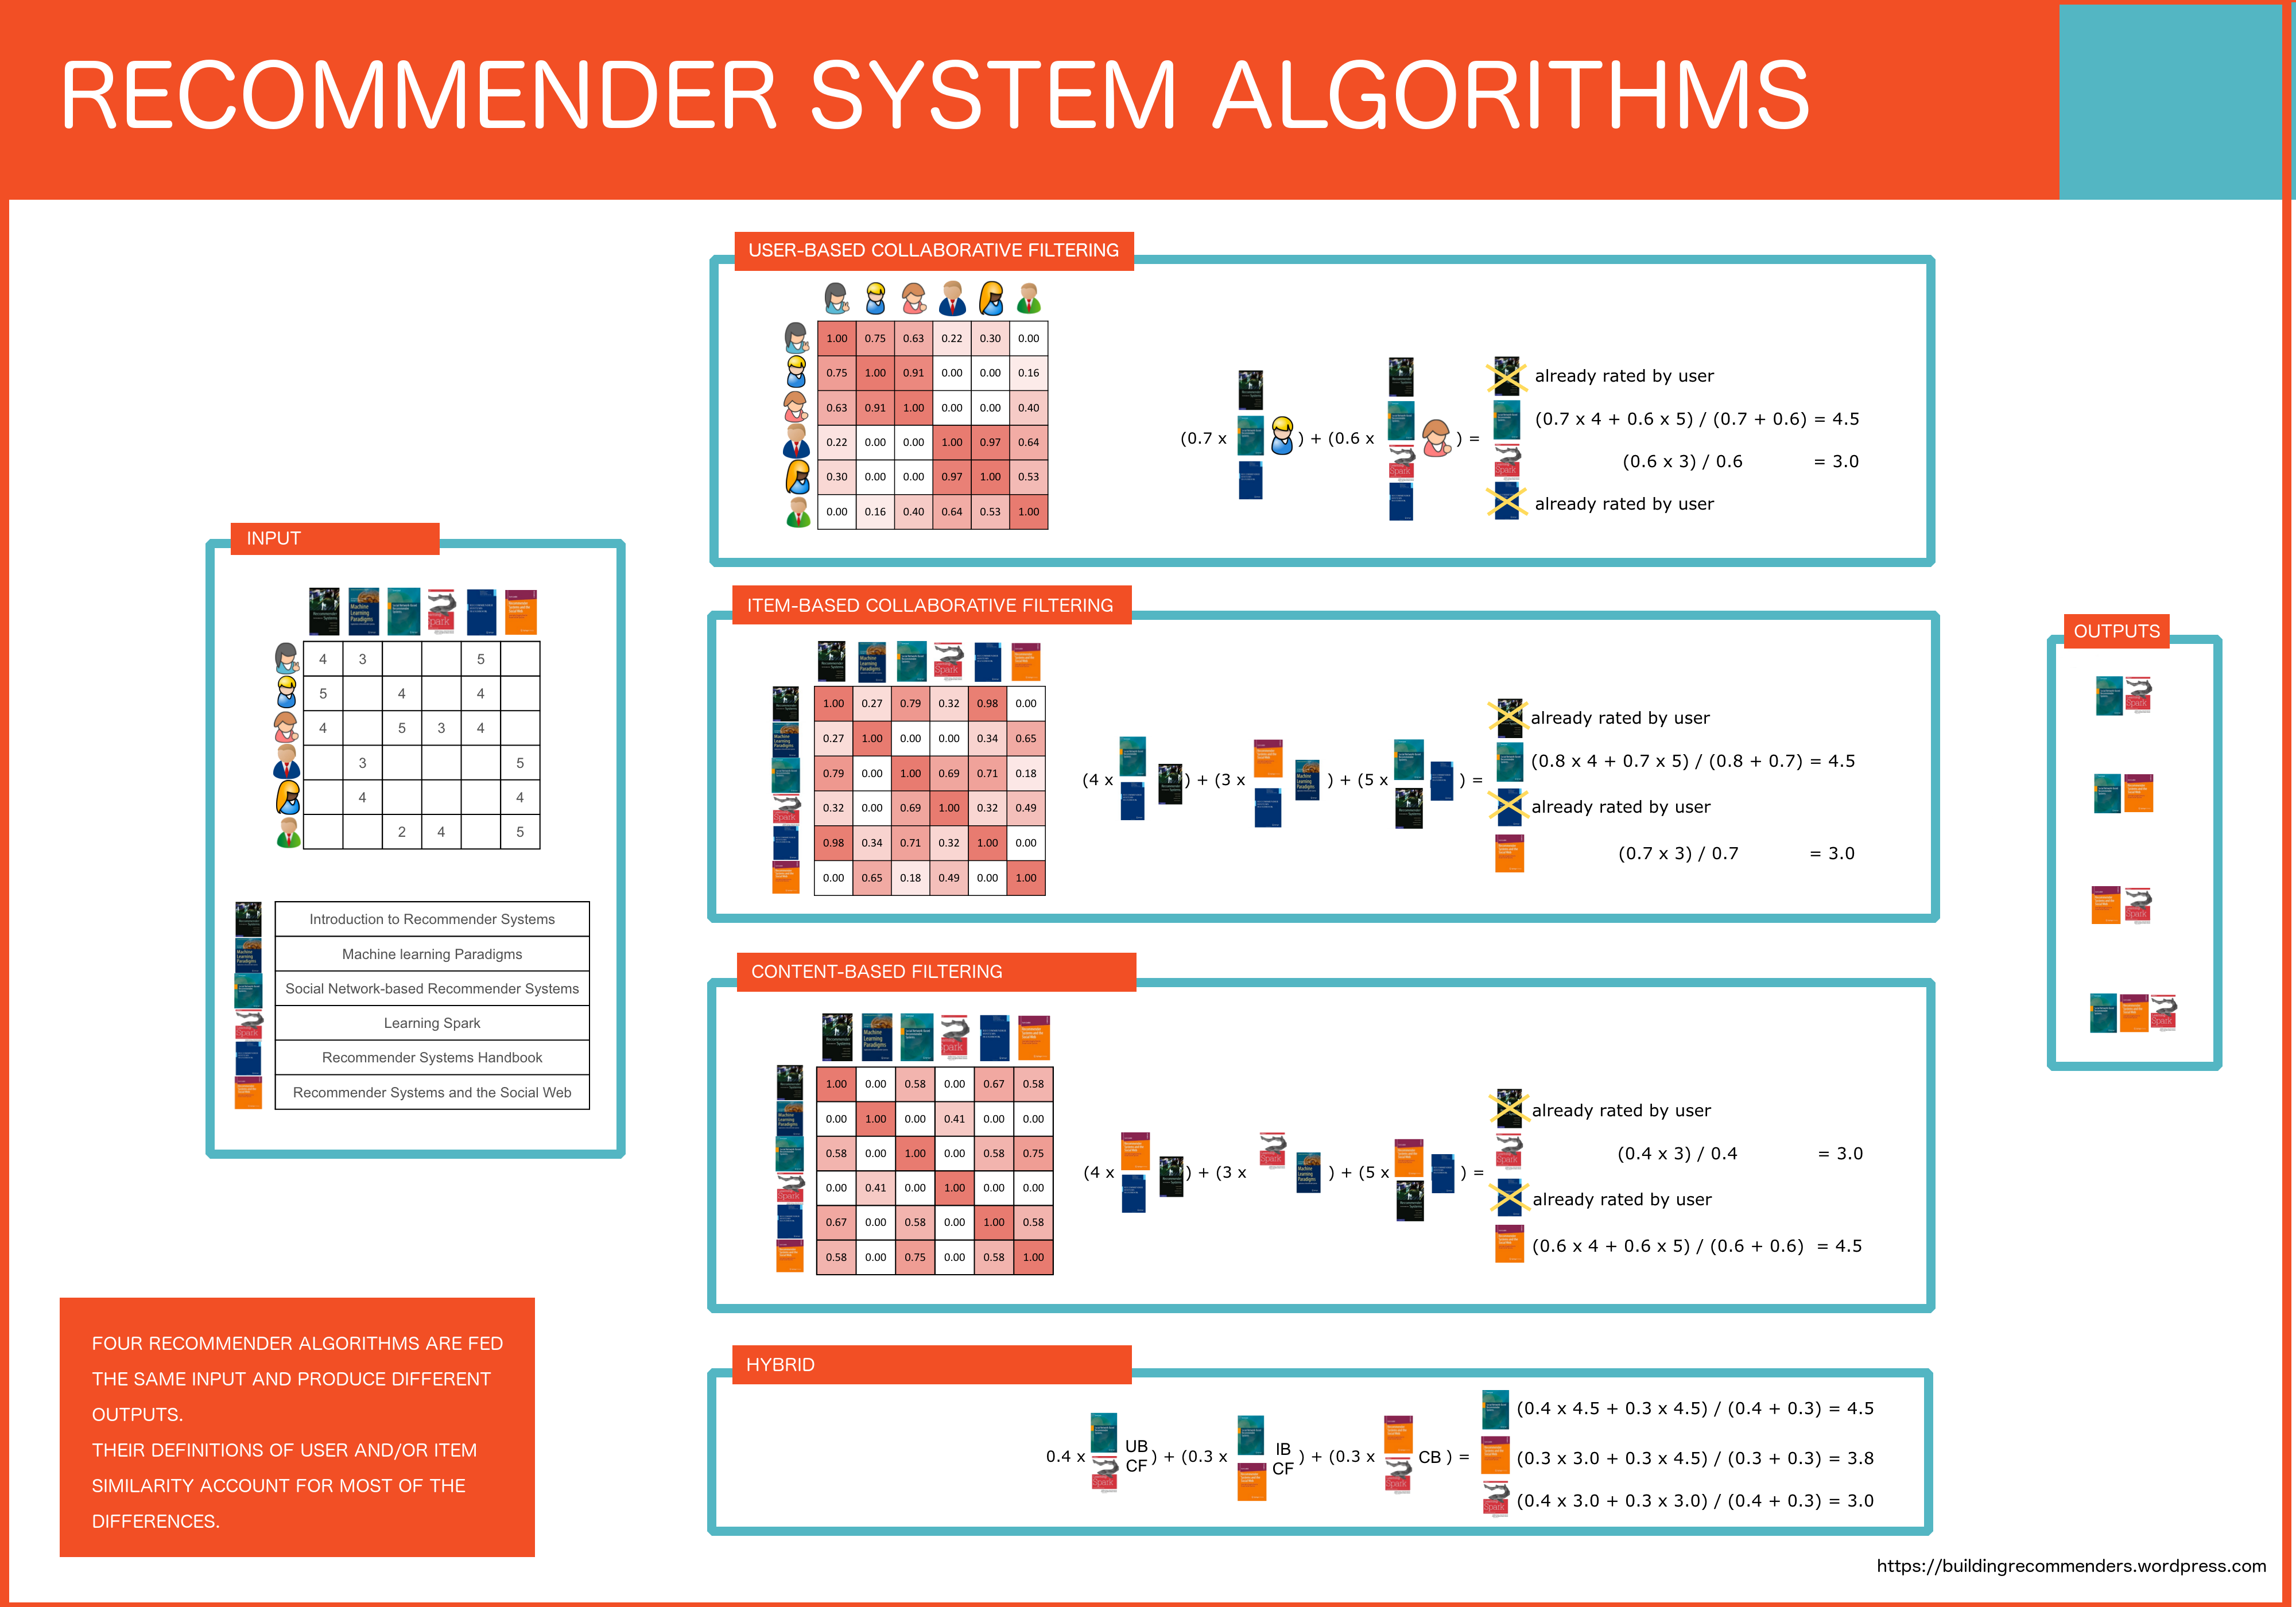

# End of Slides